In [147]:
!pwd

/kaggle/working


In [3]:
!pwd

/kaggle/working


In [4]:
import numpy as np

# Load the .npy file
file_path = '/kaggle/input/ibrahim/labels.npy'  # Replace with the actual path to your .npy file
labels = np.load(file_path, allow_pickle=True)

# Print the loaded data
print(labels[3000])


[[5.       0.207813 0.601562 0.1375   0.409375]
 [7.       0.028906 0.413281 0.054688 0.157813]
 [2.       0.359375 0.657031 0.103125 0.295313]]


In [9]:
import os

In [10]:
image_list = os.listdir('/kaggle/input/dataset-vehicle/images')

In [11]:
image_list[5694]

'ulu1924_jpg.rf.8e8fc09cc4c8897c2d20a74ab3b4d64f.jpg'

In [13]:
images_path = sorted(image_list)

In [ ]:
# for i in range(len(image_paths)):
#   if image_paths[i].endswith(".txt"):
#     print(i)

# by using this code I found the text file in 
# images dataset
# which is the 5694 value of the list images_path
# the next code cell below verifies my statment

In [16]:
print(images_path[5694])

ulu0_jpg.rf.fa56a0f31c0eb2390fe1096028be63e4.jpg


In [15]:
images_path.remove(images_path[5694])## this file reomve 
# because it is not an image as shown in the cell above 
# .txt

In [17]:
print(images_path[0])## last image in the dataset

Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg


In [18]:
print(images_path[0])

Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg


Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg

In [19]:
print(labels[5695])

[[2.       0.389423 0.706731 0.139423 0.360577]
 [2.       0.455529 0.11899  0.045673 0.088942]
 [2.       0.395433 0.151442 0.045673 0.091346]
 [4.       0.52524  0.153846 0.040865 0.100962]]


In [ ]:
import zipfile

with zipfile.ZipFile('images.zip', 'r') as zip_ref:
  zip_ref.extractall('train_data')

In [13]:
new_dir = '/kaggle/input/dataset-vehicle/images'+'/'+images_path

TypeError: can only concatenate str (not "list") to str

In [20]:
import cv2

# Assuming you have a list of image file paths

# Load images and associate labels
labeled_images = {}

for i, image_path in enumerate(images_path):
    new_dir = '/kaggle/input/dataset-vehicle/images'+'/'+image_path
    image = cv2.imread(new_dir)
    label = labels[i] 
#     elif i >= 5694:
#         image = cv2.imread(image_path)
#         label = labels[i+1]  # Get the corresponding label from the loaded labels array

    labeled_images[image_path] = {'image': image, 'label': label}


In [21]:
print(labeled_images['Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg'])

{'image': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[6, 0, 2],
        [4, 0, 0],
        [6, 1, 0],
        ...,
        [0, 8, 1],
        [0, 4, 0],
        [0, 5, 0]],

       [[7, 1, 6],
        [2, 0, 1],
        [7, 3, 2],
        ...,
        [0, 6, 3],
        [0, 3, 1],
        [0, 3, 0]],

       [[6, 2, 7],
        [2, 0, 1],
        [6, 4, 4],
        ...,
        [0, 1, 0],
        [0, 2, 0],
        [0, 2, 0]]], dtype=uint8), 'label': array([[3.      , 0.509804, 0.411765, 0.107843, 0.245098],
       [2.      , 0.210784, 0.616422, 0.127451, 0.232843]], dtype=float32)}


In [22]:
# Check lengths
print("Number of labels:", len(labels))
print("Number of image paths:", len(images_path))

Number of labels: 8218
Number of image paths: 8218


In [23]:
# Example: Access and display a labeled image
sample_image_path = 'Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg'
sample_data = labeled_images[sample_image_path]

image = sample_data['image']
label = sample_data['label']

In [24]:
print(label)# 3 is LCV 
            # 2 is car

[[3.       0.509804 0.411765 0.107843 0.245098]
 [2.       0.210784 0.616422 0.127451 0.232843]]


In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [26]:
image.shape

(408, 408, 3)

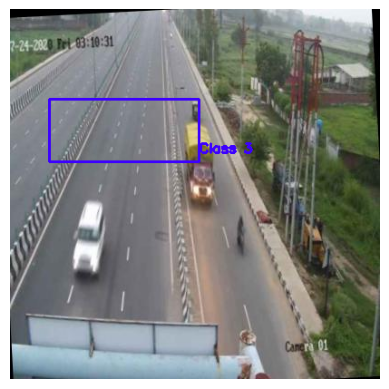

In [31]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [33]:
box_info = label[0]
class_label, x_min, y_min, x_max, y_max = box_info
x_min = x_min * 408
y_min = y_min * 408
x_max = x_max * 408
y_max = y_max * 408
color = (255, 0, 60)  # Green color
thickness = 2  # Thickness of the bounding box lines
# cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color, thickness)
# cv2.putText(image, f"Class {int(class_label)}", (int(x_min), int(y_min) - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

In [25]:
label[0]

array([3.      , 0.509804, 0.411765, 0.107843, 0.245098], dtype=float32)

In [26]:
image.shape

(408, 408, 3)

In [35]:
label[0]

array([3.      , 0.509804, 0.411765, 0.107843, 0.245098], dtype=float32)

In [27]:
import cv2
import numpy as np

 

# Assuming you have loaded the image into the variable img
img = cv2.imread('/kaggle/input/dataset-vehicle/images'+'/'+sample_image_path)

 

# List of bounding box data
label[0] = [3.      , 0.509804, 0.411765, 0.107843, 0.245098]

 


In [28]:

# Image shape
height, width, _ = img.shape

 



In [30]:
import cv2
import numpy as np

 
class_id, center_x_normalized, center_y_normalized, width_normalized, height_normalized = label[0]

    # Convert normalized values to pixel values
center_x_pixel = int(center_x_normalized * width)
center_y_pixel = int(center_y_normalized * height)
width_pixel = int(width_normalized * width)
height_pixel = int(height_normalized * height)

    # Convert center coordinates to top-left coordinates
top_left_x = center_x_pixel - width_pixel // 2
top_left_y = center_y_pixel - height_pixel // 2

    # Convert center coordinates to bottom-right coordinates
bottom_right_x = center_x_pixel + width_pixel // 2
bottom_right_y = center_y_pixel + height_pixel // 2

    # Draw bounding box on image
color = (0, 255, 0)  # Green color for bounding box
cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, 2)

 

# Display the image with bounding boxes


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[6, 0, 2],
        [4, 0, 0],
        [6, 1, 0],
        ...,
        [0, 8, 1],
        [0, 4, 0],
        [0, 5, 0]],

       [[7, 1, 6],
        [2, 0, 1],
        [7, 3, 2],
        ...,
        [0, 6, 3],
        [0, 3, 1],
        [0, 3, 0]],

       [[6, 2, 7],
        [2, 0, 1],
        [6, 4, 4],
        ...,
        [0, 1, 0],
        [0, 2, 0],
        [0, 2, 0]]], dtype=uint8)

In [33]:
print(label[0])

[3.       0.509804 0.411765 0.107843 0.245098]


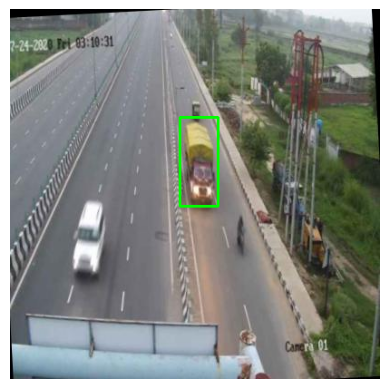

In [31]:
# cv2.imshow('Image with Bounding Boxes', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [32]:
img.shape

(408, 408, 3)

In [35]:
import cv2
import numpy as np

 

# Assuming you have loaded the image into the variable img
img2 = cv2.imread('/kaggle/input/dataset-vehicle/images'+'/'+sample_image_path)

 

# List of bounding box data
Bbox = label[1]


In [36]:
print(Bbox)

[2.       0.210784 0.616422 0.127451 0.232843]


In [37]:
import cv2
import numpy as np

 
class_id, center_x_normalized, center_y_normalized, width_normalized, height_normalized = Bbox

    # Convert normalized values to pixel values
center_x_pixel = int(center_x_normalized * width)
center_y_pixel = int(center_y_normalized * height)
width_pixel = int(width_normalized * width)
height_pixel = int(height_normalized * height)

    # Convert center coordinates to top-left coordinates
top_left_x = center_x_pixel - width_pixel // 2
top_left_y = center_y_pixel - height_pixel // 2

    # Convert center coordinates to bottom-right coordinates
bottom_right_x = center_x_pixel + width_pixel // 2
bottom_right_y = center_y_pixel + height_pixel // 2

    # Draw bounding box on image
color = (0, 255, 0)  # Green color for bounding box
cv2.rectangle(img, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, 2)

 

# Display the image with bounding boxes

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[6, 0, 2],
        [4, 0, 0],
        [6, 1, 0],
        ...,
        [0, 8, 1],
        [0, 4, 0],
        [0, 5, 0]],

       [[7, 1, 6],
        [2, 0, 1],
        [7, 3, 2],
        ...,
        [0, 6, 3],
        [0, 3, 1],
        [0, 3, 0]],

       [[6, 2, 7],
        [2, 0, 1],
        [6, 4, 4],
        ...,
        [0, 1, 0],
        [0, 2, 0],
        [0, 2, 0]]], dtype=uint8)

In [40]:
top_left_x



59

In [41]:
top_left_y 


204

In [43]:
bottom_right_x 
 

111

In [44]:
bottom_right_y

298

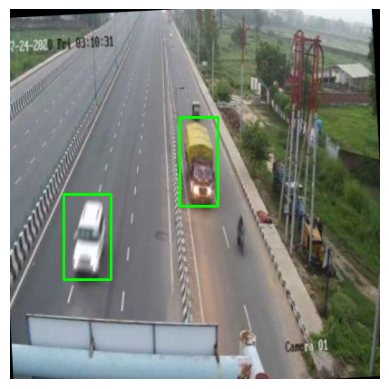

In [38]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [30]:
image_width = 408 
image_height = 408

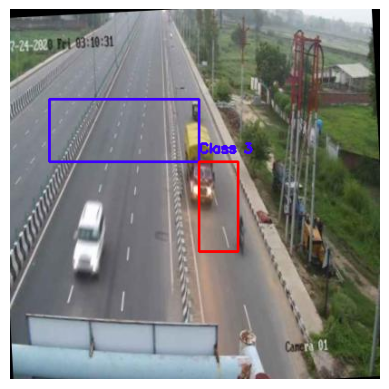

In [33]:
class_label, x_norm, y_norm, width_norm, height_norm = label[0]

x_pixel = int(x_norm * image_width)
y_pixel = int(y_norm * image_height)
width_pixel = int(width_norm * image_width)
height_pixel = int(height_norm * image_height)
    
# Draw the bounding box
color = (0, 0, 255)  # Red color
thickness = 2
start_point = (x_pixel, y_pixel)
end_point = (x_pixel + width_pixel, y_pixel + height_pixel)
image = cv2.rectangle(image, start_point, end_point, color, thickness)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
# Display the image with bounding boxes
# cv2.imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [30]:
clas, x, y, width, height = label[0]
    
# Convert coordinates to pixel values
x_pixel = int(x * image_width)
y_pixel = int(y * image_height)
width_pixel = int(width * image_width)
height_pixel = int(height * image_height)
    
    # Calculate end point based on width and height
end_x_pixel = x_pixel + width_pixel
end_y_pixel = y_pixel + height_pixel
    
# Draw the bounding box
color = (50, 150, 255)  # Red color
thickness = 2
start_point = (x_pixel, y_pixel)
end_point = (end_x_pixel, end_y_pixel)
image = cv2.rectangle(image, start_point, end_point, color, thickness)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

NameError: name 'image_width' is not defined

In [29]:
bounding_box = sample_data['label']  # Replace with actual bounding box coordinates

# Draw the bounding box on the image
x_min, y_min, x_max, y_max = bounding_box
cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # Green rectangle

# Display the labeled image with bounding box using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

ValueError: not enough values to unpack (expected 4, got 2)

In [278]:
image_path = '/content/drive/MyDrive/Vehicle_detection/train_data/images/Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg'
image = cv2.imread(image_path)

# Sample label in the format: [[class, x_min, y_min, width, height], ...]
sample_label =  sample_data['label']

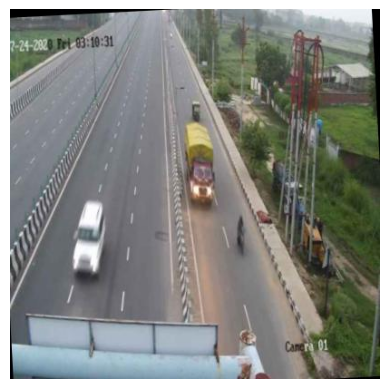

In [279]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [28]:
print(sample_label)

NameError: name 'sample_label' is not defined

In [206]:
sample_label.ndim

2

In [192]:
image.shape

(408, 408, 3)

In [194]:
# Convert bounding box coordinates to pixel values
height, width, _ = image.shape

In [195]:
height

408

In [196]:
width

408

In [197]:
_

3

In [226]:

sample_label[0][1] = sample_label[0][1]  * width  # x_min
sample_label[0][2] = sample_label[0][2] * height  # y_min
sample_label[0][3] = sample_label[0][3] * width  # width
sample_label[0][4] = sample_label[0][4] * height  # height

In [222]:

for label_info in sample_label:
    class_label = int(label_info[0])
    x_min, y_min, box_width, box_height = map(int, label_info[1:])
    x_max = x_min + box_width
    y_max = y_min + box_height
    color = (255, 255, 0)  # Green color
    thickness = 2  # Thickness of the bounding box lines
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

cv2.putText(image, f"Class {class_label}", (x_min, y_min - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)
# Display the image with bounding boxes using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



error: ignored

In [224]:
# Get the adjusted bounding box coordinates
classs =
x_min = int(sample_label[0][1])
y_min = int(sample_label[0][2])
width = int(sample_label[0][3])
height = int(sample_label[0][4])

# Calculate x_max and y_max
x_max = x_min + width
y_max = y_min + height

# Draw bounding box on the image
color = (0, 255, 0)  # Green color
thickness = 2  # Thickness of the bounding box lines
cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

error: ignored

In [225]:
x_max = x_min + width
y_max = y_min + height

# Draw bounding box on the image
color = (0, 255, 0)  # Green color
thickness = 2  # Thickness of the bounding box lines

# Convert the coordinates to tuples
pt1 = (x_min, y_min)
pt2 = (x_max, y_max)

# Draw the rectangle
cv2.rectangle(image, pt1, pt2, color, thickness)

# Display the image with bounding box using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

error: ignored

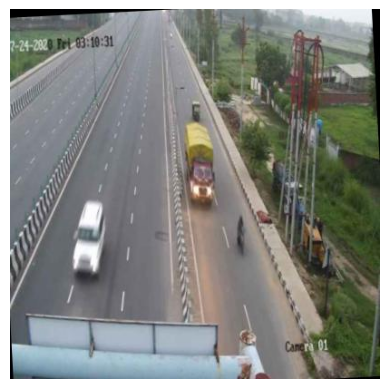

In [201]:

# Display the image with bounding boxes using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [218]:
# Iterate over each bounding box in the label
for box_info in sample_label:
    class_label, x_min, y_min, width, height = box_info
    x_max = x_min + width
    y_max = y_min + height
    color = (0, 255, 0)  # Green color
    thickness = 200  # Thickness of the bounding box lines
    cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color, thickness)
    cv2.putText(image, f"Class {int(class_label)}", (int(x_min), int(y_min) - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

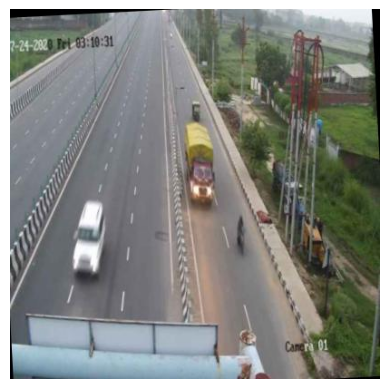

In [219]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Box info: [3.0000000e+00 3.4624520e+07 2.7965972e+07 7.3244065e+06 1.6646397e+07]

Box info: [2.0000000e+00 1.4315882e+07 4.1865724e+07 8.6561300e+06 1.5814070e+07]


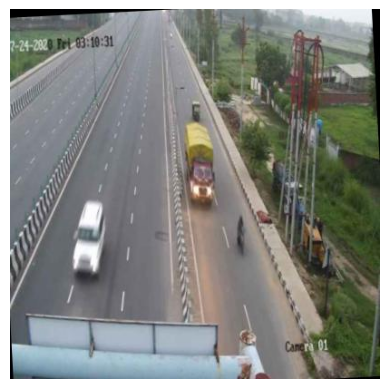

In [220]:

for box_info in sample_label:
    print("Box info:", box_info)

    # Rest of the code for drawing bounding boxes

# Display the image with bounding boxes using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [227]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2041: RuntimeWarning: invalid value encountered in double_scalars

  self._mtx[0, 2] += tx

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in double_scalars

  return (x0, y0, x1 - x0, y1 - y0)


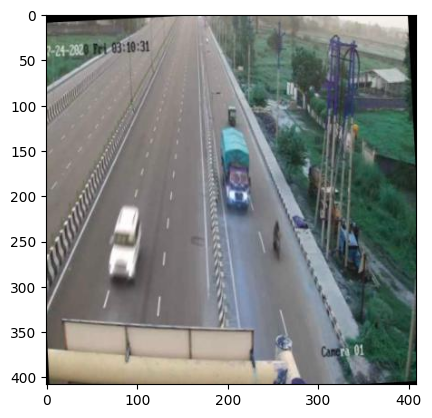

In [232]:
# Create a figure and axis
fig, ax = plt.subplots(1)

# Iterate through each label in the label data

class_idx, x_min_norm, y_min_norm, width_norm, height_norm = sample_label[0]

# Convert normalized coordinates to pixel values
x_min = x_min_norm * width
y_min = y_min_norm * height
width = width_norm * width
height = height_norm * height

# Create a rectangle patch for the bounding box
rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle patch to the axis
ax.add_patch(rect)

# Show the plot with the image and bounding boxes
plt.imshow(image)

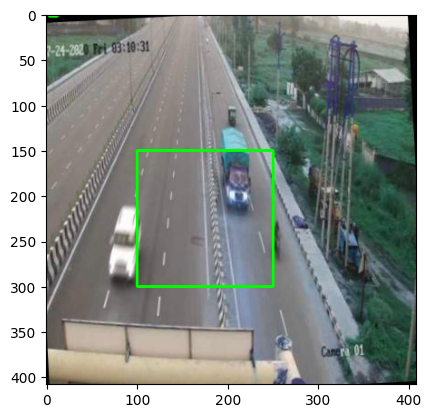

In [277]:
plt.imshow(image)

In [295]:
for label in sample_label:
    class_idx, x_min_norm, y_min_norm, width_norm, height_norm = label

    # Convert normalized coordinates to pixel values
    x_min = (np.float64(x_min_norm * 408))
    y_min = (np.float64(y_min_norm * 408))
    width = (np.float64(width_norm * 408))
    height = (np.float(height_norm * 408))

<ipython-input-295-c58b6e162246>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

  height = (np.float(height_norm * 408))


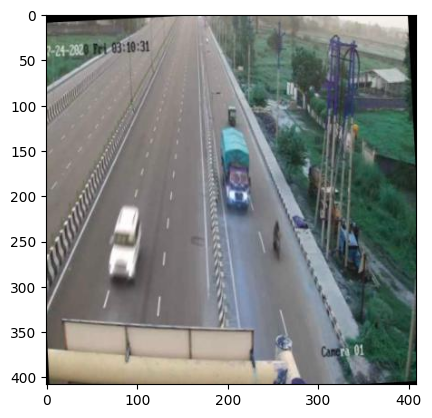

In [284]:
img = cv2.rectangle(image, (int(np.float64(3.4624520e+07)), int(np.float64(2.7965972e+07))), (int(np.float64(7.3244065e+06)), int(np.float64(1.6646397e+07))), (0, 255, 0), 2)

plt.imshow(img)

In [297]:
img = cv2.rectangle(image, (int(x_min_norm), int(y_min_norm)), (int(width),  int(height)), (0, 255, 0), 2)

plt.imshow(img)

error: ignored

In [285]:
image.shape


(408, 408, 3)